In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls
import os
import yaml
from yaml import Loader
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import copy
from utils_graphs import select_significant_areas, create_graph, plot_graph, get_colors, fig_graph_degrees
import matplotlib.colors as cm
from matplotlib.lines import Line2D

In [2]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [3]:
def create_df(df_control_cell_count,
              df_fam_cell_count,
              df_unfam_cell_count,
              subjects):
    list_areas = [volumes.loc[volumes['acronym'] == ac]['safe_name'].values[0] for ac in ['MOB',
            'AOB', 'COA', 'PAA', 'PA', 'MEA', 'BST', 'PD', 'PVp', 'MPN', 'PMv', 'ARH']]
    list_acronyms = ['MOB','AOB', 'COA', 'PAA', 'PA', 'MEA', 'BST', 'PD', 'PVp', 'MPN', 'PMv', 'ARH']
    columns = ['area', 'cells', 'group', 'subject']
    
    control = pd.DataFrame(columns=columns)
    fam = pd.DataFrame(columns=columns)
    unfam = pd.DataFrame(columns=columns)
    
    control['area'] = [area for area in list_acronyms for sub in subjects if sub[-1]=='l']
    control['subject'] = [sub for are in list_acronyms for sub in subjects if sub[-1]=='l']
    control['group'] = ['Control' for area in list_areas for sub in subjects if sub[-1]=='l']
    control['cells'] = [df_control_cell_count.set_index('area').loc[area][sub] for area in list_areas for sub in subjects if sub[-1]=='l']

    fam['area'] = [area for area in list_acronyms for sub in subjects if sub[-3:]=='Fam']
    fam['subject'] = [sub for are in list_acronyms for sub in subjects if sub[-3:]=='Fam']
    fam['group'] = ['Fam' for area in list_areas for sub in subjects if sub[-3:]=='Fam']
    fam['cells'] = [df_fam_cell_count.set_index('area').loc[area][sub] for area in list_areas for sub in subjects if sub[-3:]=='Fam']

    unfam['area'] = [area for area in list_acronyms for sub in subjects if sub[-5:]=='Unfam']
    unfam['subject'] = [sub for are in list_acronyms for sub in subjects if sub[-5:]=='Unfam']
    unfam['group'] = ['Unfam' for area in list_areas for sub in subjects if sub[-5:]=='Unfam']
    unfam['cells'] = [df_unfam_cell_count.set_index('area').loc[area][sub] for area in list_areas for sub in subjects if sub[-5:]=='Unfam']
    df = control.append(fam).append(unfam)
    
    return df

# Number of cells per relevant area

## WITH FATHER

In [4]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
batch='WILD_with_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_with_father2500.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
wild_wf = create_df(df_control_cell_count,
              df_fam_cell_count,
              df_unfam_cell_count,
              subjects)

<ipython-input-5-179e3611a8b0>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


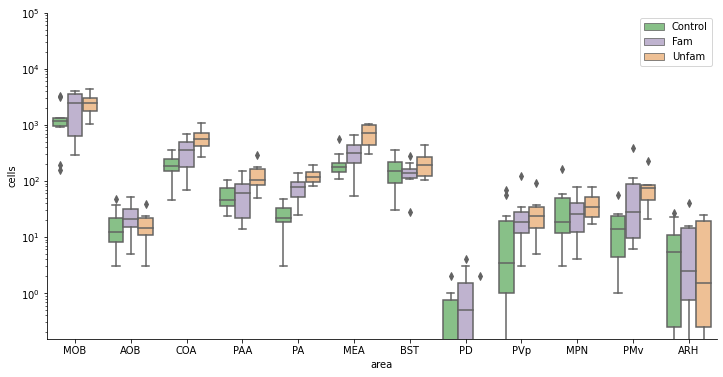

In [5]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=wild_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/boxplot_WILD_WF.svg')

/home/stella/anaconda2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-6-79b279c3ed3d>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


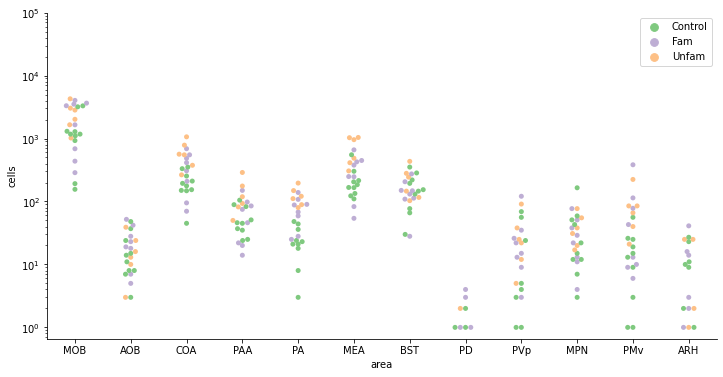

In [6]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=wild_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/swarmplot_WILD_WF.svg')

## WITHOUT FATHER

In [7]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_without_father'
batch='WILD_without_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_without_father2500.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
wild_wof = create_df(df_control_cell_count,
              df_fam_cell_count,
              df_unfam_cell_count,
              subjects)

<ipython-input-8-25ab4dcee10c>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


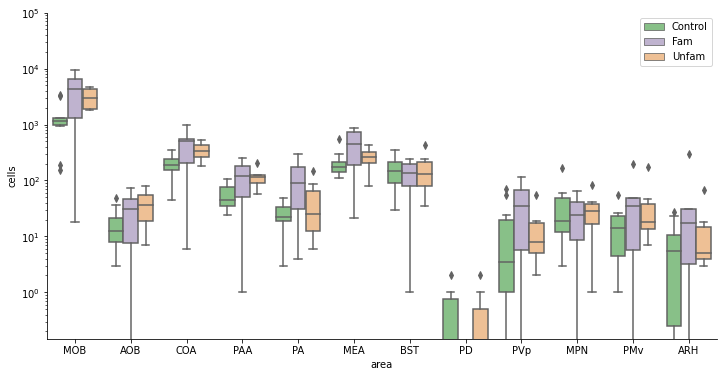

In [8]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=wild_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/boxplot_WILD_WOF.svg')

/home/stella/anaconda2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-9-b14b495817bb>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


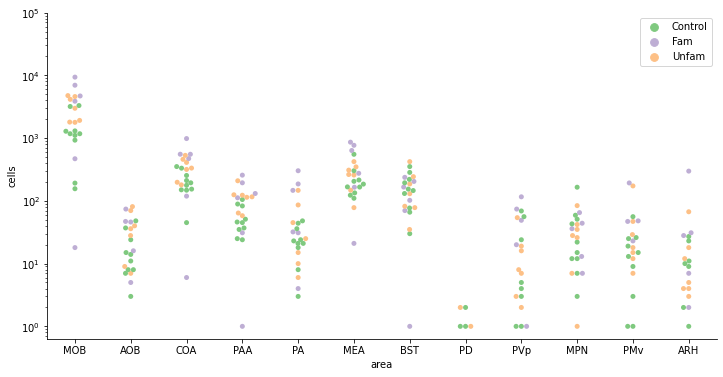

In [9]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=wild_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/swarmplot_WILD_WOF.svg')

# BLACK

## WITH FATHER

In [10]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'C57_MaleUrine_Exposure_cFos'
batch='c57'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
c57_wf = create_df(df_control_cell_count,
              df_fam_cell_count,
              df_unfam_cell_count,
              subjects)

<ipython-input-11-a8d62357c05e>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


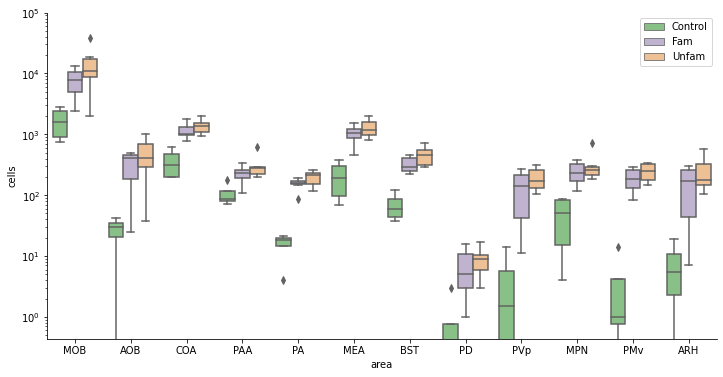

In [11]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=c57_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/boxplot_c57_WF.svg')

<ipython-input-12-6ae1e430ab3b>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


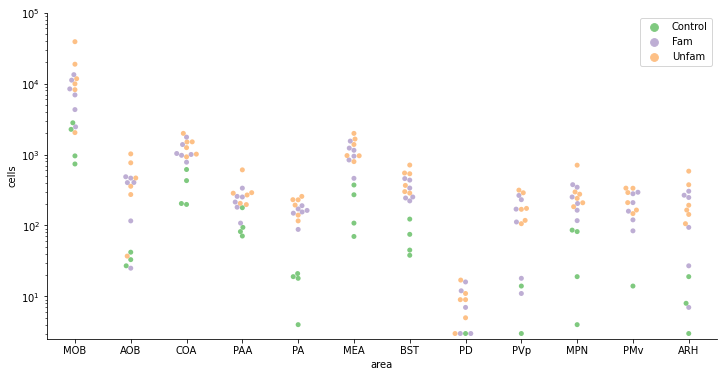

In [12]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=c57_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/swarmplot_c57_WF.svg')

## WITHOUT FATHER

In [13]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'BL_woF'
batch='BL_woF'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')
c57_wof = create_df(df_control_cell_count,
              df_fam_cell_count,
              df_unfam_cell_count,
              subjects)

<ipython-input-14-13f4c05b4985>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


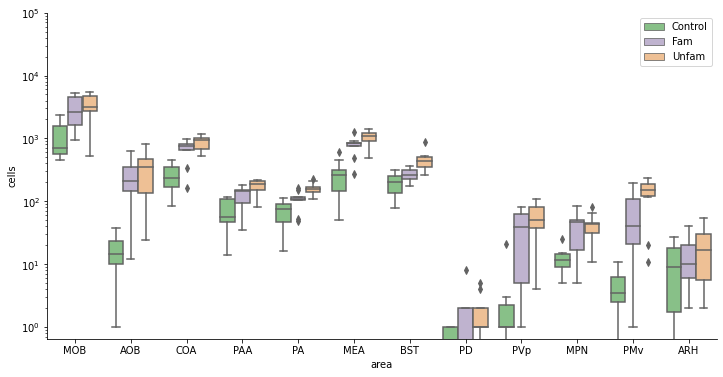

In [14]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=c57_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/boxplot_c57_WOF.svg')

/home/stella/anaconda2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-15-a4ccc7ce3537>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


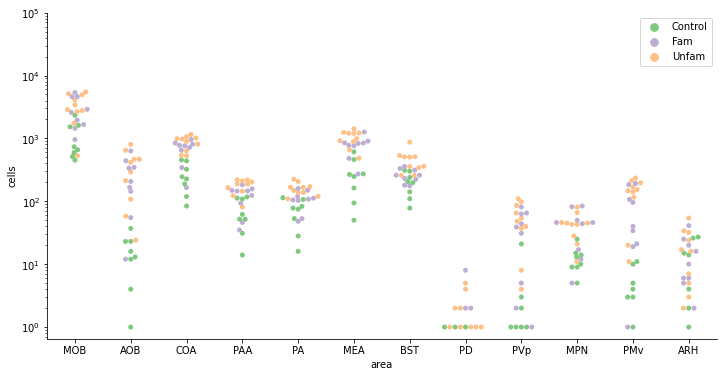

In [15]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=c57_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)
plt.savefig('/home/stella/Documents/Torino/projects/SexualImprinting/figures/figure_presentazione_vienna12092023/swarmplot_c57_WOF.svg')